# Logistic Regression with a Neural Network mindset
## April 7th, 2018
[The code and the data were obtained from this GitHub link](https://github.com/AISaturdaysBCN/deeplearning_andrewng/blob/master/Course1-DL-basic/__empty_notebook/1-Logistic%2BRegression%2Bwith%2Ba%2BNeural%2BNetwork%2Bmindset%2Bv3.ipynb)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy #module with mathematical algorithms 
import h5py #to interact with a dataset that is stored on an H5 file
from PIL import Image #test your model with your own picture at the end
from scipy import ndimage #the same as above

Hierarchical Data Format such as **file.h5** is designed to store and organize large amounts of data

In [3]:
#Function to read h5 files
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
#Identify where is this Jupyter notebook: 
!pwd

/Users/raziel/Jupyter/Artificial Intelligence/Session1


In [5]:
#Important to create the folder 'datasets' because the function include it 
os.listdir('/Users/raziel/Jupyter/Artificial Intelligence/Session1/datasets')

['test_catvnoncat.h5', 'train_catvnoncat.h5']

In [6]:
#Read the h5 files
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset() #using the function defined above

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them.

In [62]:
train_set_x_orig

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [7]:
#Know the dimension of the images
#In this variable there're 209 photos, with a 64x64 pixels (red, green, blue)
train_set_x_orig.shape

(209, 64, 64, 3)

In [8]:
#Y is either 1 begging a cat or 0 not begging a cat, with one row and 209 columns
train_set_y.shape

(1, 209)

y = [1], it's a 'cat' picture.


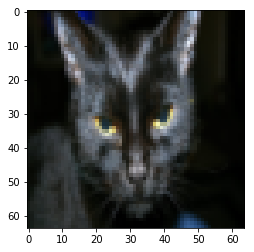

In [40]:
#Example of a picture: 
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [0], it's a 'non-cat' picture.


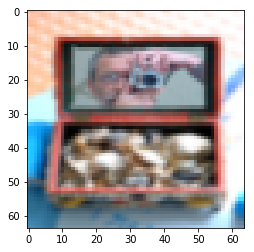

In [41]:
#Another example of a picture: 
index = 15
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

**Description of the Photo data:**

In [68]:
general_train= train_set_x_orig.shape
general_test= test_set_x_orig.shape
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px =train_set_x_orig.shape[1]

print("General structure of train_set_x_orig:" + str(general_train))
print("General structure of test_set_x_orig:"+ str(general_test))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

General structure of train_set_x_orig:(209, 64, 64, 3)
General structure of test_set_x_orig:(50, 64, 64, 3)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [69]:
# Reshape the training and test examples: it's like melt in R

m_train, num_px1, num_px2, channel = train_set_x_orig.shape
img_size = num_px1 * num_px2 * channel
train_set_x_flatten = train_set_x_orig.reshape((m_train, img_size)).T
test_set_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0], img_size)).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Standardize our dataset:** To represent color images, the red, green and blue channels  must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
So in order to standardize our dataset we're going to divide by the highest pixel values

In [44]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## Let's start the Logistic regresssion to identify cats and not cats

Given $$X$$; we want an algorithm that can predict an ouput: $$\hat{Y}=0,1$$ $$\hat{Y}=P(Y=1|X)$$
Parameters: $$w \in \ R^{n_{x}} \quad b \in R$$
Output: $$\hat{Y}=\sigma(w^TX+b)$$
The sigmoid function is: $$g(z)=\frac{1}{(1+e^{-z})}$$

## Gradient descent function:

**Loss function** (to measure how good our model is): R^2 does not work well with gradient descent<br/><br/>
$$L(\hat{y},y)= -[ylog(\hat{y})+(1-y)log(1-\hat{y})]$$
We want that the loss function to be as low as possible<br/><br/>
**The Overall Cost function**: the cost of your parameters
$$J(w,b)=\frac{1}{m}\sum_{i=1}^{m}(L(\hat{y}^{(i)},y^{(i)}))$$<br/>
The important message: 
> The **loss function** computes the error of a single training example,
> the **cost function** is the *average* of the *loss function of the entire training set*

**Gradient descent**: we want to the values in w and b that minimize the *cost function*. In order to start we initialize the parameters to some *initial values*; usually you initialize the values to zero or you can use random initialization.<br/>
Due we want to find the minimum in the *cost function*; we do the following: 
$$w:=w-\alpha\frac {\partial J(w,b)}{\partial w}$$
$$b:=b-\alpha\frac {\partial J(w,b)}{\partial b}$$
":=" means update<br/>
"alpha" means *learning rate*: controls how big a step we take on each iteration 

Gradient descent function:

In [46]:
# GRADED FUNCTION: sigmoid function

def sigmoid(z):
    """Compute the sigmoid of z. Arguments: z: a scalar or numpy array of any size. Return: s: sigmoid(z)"""
    s = 1 / (1 + np.exp(-z))
    return s

In [47]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### Initialize with zeros the gradient descent 

In [48]:
def initialize_with_zeros(dim):
    """This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument: dim: size of the w vector we want (or number of parameters in this case)
    Returns:
    w: initialized vector of shape (dim, 1)
    b: initialized scalar (corresponds to the bias)"""
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [49]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


Gradient function: Propagate

In [50]:
def propagate(w, b, X, Y):
    """Implement the cost function and its gradient for the propagation
    Arguments:
    w: weights, a numpy array of size (num_px * num_px * 3, 1)
    b: bias, a scalar
    X: data of size (num_px * num_px * 3, number of examples)
    Y: true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost: negative log-likelihood cost for logistic regression
    dw: gradient of the loss with respect to w, thus same shape as w
    db: gradient of the loss with respect to b, thus same shape as b"""

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b) #Compute activation                                  
    cost = - np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m  #Compute cost                               
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X , (A - Y).T) / m
    db = np.sum(A - Y) / m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [70]:
#Introduce the parameters:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
